Group Members:


1.   Vivian Wang (vw3852)
2.   Boran Sheu (b42973)
3.   Parthiv Borgohain (pb25347)
4.   Rukh Agha (msa3453)    



In [34]:
!pip install gurobipy
import numpy as np
import gurobipy as gp
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1) - 3)

In [35]:
# read in the csv file for ROI data
roi = pd.read_csv('ROI_data.csv', index_col = 'Platform')
roi

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [36]:
obj1 = np.array(roi.iloc[0]) # objective vector

A1 = np.zeros((3,len(roi.columns))) # initialize constraint matrix

# budget constraint
A1[0,:] = [1]*len(roi.columns) 

# constraint a
A1[1,roi.columns.get_loc('Print')] = 1; A1[1, roi.columns.get_loc('TV')] = 1
A1[1,roi.columns.get_loc('Facebook')] = -1; A1[1, roi.columns.get_loc('Email')] = -1

# contraint b
A1[2,roi.columns.get_loc('Facebook')] = 1; A1[2, roi.columns.get_loc('LinkedIn')] = 1
A1[2,roi.columns.get_loc('Instagram')] = 1; A1[2, roi.columns.get_loc('Snapchat')] = 1
A1[2,roi.columns.get_loc('Twitter')] = 1
A1[2,roi.columns.get_loc('SEO')] = -2; A1[2, roi.columns.get_loc('AdWords')] = -2

b1 = np.array([10,0,0])
sense1 = np.array(['<','<','>'])

In [38]:
ojModel1 = gp.Model() # initialize an empty model

ojModX1 = ojModel1.addMVar(len(roi.columns), lb=np.array([0]*len(roi.columns)), ub = np.array([3]*len(roi.columns)))
# lower bound of zero and upper bound of 3 million for every platform
# must define the variables before adding constraints because variables go into the constraints

ojModCon1 = ojModel1.addMConstrs(A1, ojModX1, sense1, b1) # add the constraints to the model
ojModel1.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
# quadratic = None, constant = 0(does not affect output)

ojModel1.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel1.Params.TimeLimit = 3600

In [39]:
ojModel1.optimize()
mod1_objval = ojModel1.objVal
mod1_x = ojModX1.x
print("Optimal return is ",mod1_objval,"Million USD")

df1 = pd.DataFrame()
df1['First_ROI'] = ['ROI','Allocation ($M)']
columns = list(roi.columns.values)
x = 0

for col in columns:
    df1[col] = [obj1[x],mod1_x[x]]
    x += 1
    
df1 = df1.set_index('First_ROI')
df1

Optimal return is  0.45600000000000007 Million USD


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
First_ROI,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Allocation ($M),0.000,3.000,0.000,1.000,0.000,0.000,3.000,0.000,0.000,3.000


### Suggests to invest \$3 million in TV, \$1 million in AdWords, \$3 million in Instagram, and \$3 million in Email.

# 4)

In [40]:
obj2 = np.array(roi.iloc[1]) # objective vector

A2 = np.zeros((3,len(roi.columns))) # initialize constraint matrix

# budget constraint
A2[0,:] = [1]*len(roi.columns)

# cosntraint a
A2[1,roi.columns.get_loc('Print')] = 1; A1[1, roi.columns.get_loc('TV')] = 1
A2[1,roi.columns.get_loc('Facebook')] = -1; A1[1, roi.columns.get_loc('Email')] = -1

# constraint b
A2[2,roi.columns.get_loc('Facebook')] = 1; A2[2, roi.columns.get_loc('LinkedIn')] = 1
A2[2,roi.columns.get_loc('Instagram')] = 1; A2[2, roi.columns.get_loc('Snapchat')] = 1
A2[2,roi.columns.get_loc('Twitter')] = 1
A2[2,roi.columns.get_loc('SEO')] = -2; A2[2, roi.columns.get_loc('AdWords')] = -2

b2 = np.array([10,0,0])
sense2 = np.array(['<','<','>'])

In [41]:
ojModel2 = gp.Model() # initialize an empty model

ojModX2 = ojModel2.addMVar(len(roi.columns), lb=np.array([0]*len(roi.columns)), ub = np.array([3]*len(roi.columns)))
# lower bound of zero and upper bound of 3 million for every platform
# must define the variables before adding constraints because variables go into the constraints

ojModCon2 = ojModel2.addMConstrs(A2, ojModX2, sense2, b2) # add the constraints to the model
ojModel2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
# quadratic = None, constant = 0(does not affect output)

ojModel2.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel2.Params.TimeLimit = 3600

In [42]:
ojModel2.optimize()
mod2_objval = ojModel2.objVal
mod2_x = ojModX2.x
print("Optimal return is ",mod2_objval,"Million USD")

df2 = pd.DataFrame()
df2['Second_ROI'] = ['ROI','Allocation ($M)']
columns = list(roi.columns.values)
x = 0

for col in columns:
    df2[col] = [obj2[x],mod2_x[x]]
    x += 1
    
df2.set_index('Second_ROI')
df2

Optimal return is  0.45600000000000007 Million USD


,Second_ROI,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026
1,Allocation ($M),3.000,0.000,0.000,1.000,3.000,3.000,0.000,0.000,0.000,0.000


### Suggests to invest \$3 million in Print, \$1 million in AdWords, \$3 million in Facebook, and \$3 million in LinkedIn.

# 5)

In [43]:
first_roi_using_second = (obj1 * mod2_x).sum() # using second allocation on first ROI
print("If we used second allocation on first ROI, objective value is ",first_roi_using_second,"million USD")

If we used second allocation on first ROI, objective value is  0.252 million USD


In [44]:
print("If we used first allocation on first ROI, objective value is ",mod1_objval,"million USD")

If we used first allocation on first ROI, objective value is  0.45600000000000007 million USD


In [45]:
print("Difference is: ",first_roi_using_second - mod1_objval,"million USD")

Difference is:  -0.20400000000000007 million USD


### Assuming the first ROI is correct, the objective using the second allocation is $204,000 lower than the optimal objective value.

In [46]:
second_roi_using_first = (obj2 * mod1_x).sum() # using first allocation on second ROI
print("If we used first allocation on second ROI, objective value is ",second_roi_using_first,"million USD")

If we used first allocation on second ROI, objective value is  0.264 million USD


In [47]:
print("If we used second allocation on second ROI, objective value is ",mod2_objval,"million USD")

If we used second allocation on second ROI, objective value is  0.45600000000000007 million USD


In [48]:
print("Difference is: ",second_roi_using_first - mod2_objval,"million USD")

Difference is:  -0.19200000000000006 million USD


### Assuming the second ROI is correct, the objective using the first allocation is $192,000 lower than the optimal objective value.

# 6)

In [49]:
lower_roi = ojModX1.SAObjLow
upper_roi = ojModX1.SAObjUp
df3 = pd.DataFrame()
df3['ROI'] = ['Upper Bound','Lower Bound']
columns = list(roi.columns.values)

x = 0
for col in columns:
    df3[col] = [upper_roi[x], lower_roi[x]]
    x += 1

print("These are the ranges in which each medium's ROI can change and still result in the same allocation found in step 3:")
df3.set_index('ROI')

These are the ranges in which each medium's ROI can change and still result in the same allocation found in step 3:


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
ROI,,,,,,,,,,
Upper Bound,0.049,0.062,0.039,0.046,0.029,0.039,inf,0.039,0.039,inf
Lower Bound,-inf,0.039,-inf,0.033,-inf,-inf,0.039,-inf,-inf,0.029


# 7)

In [50]:
# read in csv file for ROI data
roi_mat = pd.read_csv('roi_mat.csv', index_col = 'Unnamed: 0')

months = roi_mat.index.values
roi_mat

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [51]:
df4 = pd.DataFrame(columns = list(roi_mat.columns.values))

initial_amount = 10
return_percentage = 0
profit = []
total_amount = []

A = np.zeros((3,len(roi_mat.columns))) # initialize constraint matrix
A[0,:] = [1]*len(roi_mat.columns) # budget constraint
# A[1,:] = [1,1,0,0,-1,0,0,0,0,-1] # cosntraint a
A[1,roi_mat.columns.get_loc('Print')] = 1; A[1, roi_mat.columns.get_loc('TV')] = 1
A[1,roi_mat.columns.get_loc('Facebook')] = -1; A[1, roi_mat.columns.get_loc('Email')] = -1

# A[2,:] = [0,0,-2,-2,1,1,1,1,1,0] # constraint b
A[2,roi_mat.columns.get_loc('Facebook')] = 1; A[2, roi_mat.columns.get_loc('LinkedIn')] = 1
A[2,roi_mat.columns.get_loc('Instagram')] = 1; A[2, roi_mat.columns.get_loc('Snapchat')] = 1
A[2,roi_mat.columns.get_loc('Twitter')] = 1
A[2,roi_mat.columns.get_loc('SEO')] = -2; A[2, roi_mat.columns.get_loc('AdWords')] = -2
    

for i in range(len(roi_mat)):
    obj = np.array(roi_mat.iloc[i])/100
    
    b = np.array([initial_amount,0,0])
    sense = np.array(['<','<','>'])
    
    ojModel = gp.Model() # initialize an empty model

    ojModX = ojModel.addMVar(len(roi_mat.columns), lb=np.array([0]*len(roi_mat.columns)), ub = np.array([3]*len(roi_mat.columns)))
    # lower bound of zero and upper bound of 3 million for every platform
    # must define the variables before adding constraints because variables go into the constraints

    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
    # quadratic = None, constant = 0(does not affect output)

    ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
    ojModel.Params.TimeLimit = 3600
    
    #print(obj)
    ojModel.optimize()
    mod_objval = ojModel.objVal
    #print(mod_objval)
    mod_x = ojModX.x
    
    # adding the allocations to df4
    df4.loc[len(df4)] = mod_x
    
    
    #allocation.append(list(mod_x))
    profit.append(mod_objval)
    
    if mod_objval > 0:
        return_percentage = mod_objval / initial_amount
        initial_amount += initial_amount * return_percentage * 0.5
        total_amount.append(initial_amount)
        
    #print(return_percentage)
    #print(initial_amount)
    #print()



In [52]:
df4['Profit ($M)'] = profit
df4['Amount_Available_to_Invest ($M)'] = total_amount
df4 = df4.set_index(months)
df4

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Profit ($M),Amount_Available_to_Invest ($M)
January,3.000000,0.0,0.0,1.333333,0.000000,0.000000,2.666667,0.0,0.000000,3.000000,0.373000,10.186500
February,3.000000,0.0,0.0,2.395500,3.000000,0.000000,0.000000,0.0,1.791000,0.000000,0.406296,10.389648
March,0.000000,0.0,0.0,3.000000,0.000000,3.000000,1.389648,0.0,3.000000,0.000000,0.414417,10.596856
April,0.000000,0.0,0.0,3.000000,0.000000,3.000000,3.000000,0.0,1.596856,0.000000,0.414487,10.804100
May,1.804100,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,3.000000,3.000000,0.432143,11.020172
June,3.000000,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,2.020172,3.000000,0.454767,11.247555
July,1.123777,0.0,0.0,3.000000,1.123777,0.000000,3.000000,0.0,3.000000,0.000000,0.468655,11.481882
August,3.000000,0.0,0.0,1.827294,0.000000,0.654588,0.000000,0.0,3.000000,3.000000,0.487966,11.725865
September,1.362933,0.0,0.0,3.000000,0.000000,3.000000,0.000000,0.0,3.000000,1.362933,0.459220,11.955475
October,0.000000,0.0,0.0,3.000000,0.000000,3.000000,3.000000,0.0,0.000000,2.955475,0.427575,12.169263


In [53]:
difference = (df4-df4.shift(1))
difference=difference.iloc[1:,:-2]
print("Differences of greater than 1 or less than -1 are highlighted:\n")
difference.style.applymap(lambda x: 'background-color : yellow' if x>1 or x<-1 else '')

Differences of greater than 1 or less than -1 are highlighted:



,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
February,0.000000,0.000000,0.000000,1.062167,3.000000,0.000000,-2.666667,0.000000,1.791000,-3.000000
March,-3.000000,0.000000,0.000000,0.604500,-3.000000,3.000000,1.389648,0.000000,1.209000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610352,0.000000,-1.403144,0.000000
May,1.804100,0.000000,0.000000,-3.000000,0.000000,-3.000000,0.000000,0.000000,1.403144,3.000000
June,1.195900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.979828,0.000000
July,-1.876223,0.000000,0.000000,3.000000,1.123777,0.000000,0.000000,0.000000,0.979828,-3.000000
August,1.876223,0.000000,0.000000,-1.172706,-1.123777,0.654588,-3.000000,0.000000,0.000000,3.000000
September,-1.637067,0.000000,0.000000,1.172706,0.000000,2.345412,0.000000,0.000000,0.000000,-1.637067
October,-1.362933,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,-3.000000,1.592543
November,3.000000,0.000000,0.000000,-0.943579,0.000000,-1.887158,0.000000,0.000000,0.000000,0.044525


In [54]:
difference1 = abs(df4-df4.shift(1))>1
difference1 = difference1.iloc[1:,:-2]
print("All cells having an absolute difference of greater than 1 with the previous month are highlighted:\n")
difference1.style.applymap(lambda x: 'background-color : yellow' if x else '')

All cells having an absolute difference of greater than 1 with the previous month are highlighted:



,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
February,False,False,False,True,True,False,True,False,True,True
March,True,False,False,False,True,True,True,False,True,False
April,False,False,False,False,False,False,True,False,True,False
May,True,False,False,True,False,True,False,False,True,True
June,True,False,False,False,False,False,False,False,False,False
July,True,False,False,True,True,False,False,False,False,True
August,True,False,False,True,True,False,True,False,False,True
September,True,False,False,True,False,True,False,False,False,True
October,True,False,False,False,False,False,True,False,True,True
November,True,False,False,False,False,True,False,False,False,False


In [55]:
print("No. of instances where the absolute difference with the previous month allocation is greater than 1: ",difference1.apply(sum).sum())

No. of instances where the absolute difference with the previous month allocation is greater than 1:  42


**Graphs and Plots**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


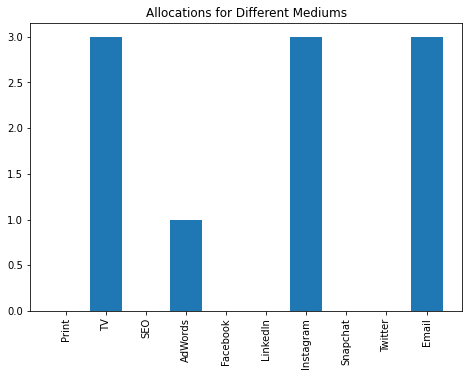

In [56]:
#First Allocation
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(columns,mod1_x)
plt.xticks(columns, columns, rotation ='vertical')
plt.tight_layout()
plt.title('Allocations for Different Mediums')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


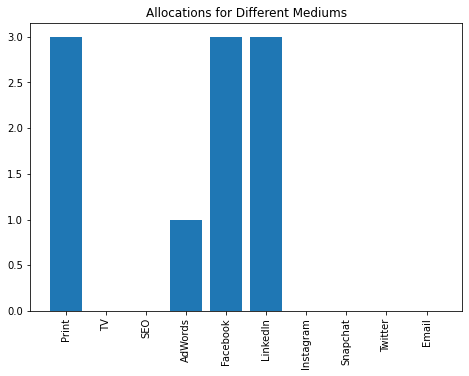

In [57]:
#Second Allocation
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(columns,mod2_x)
plt.xticks(columns, columns, rotation ='vertical')
plt.tight_layout()
plt.title('Allocations for Different Mediums')
plt.show()

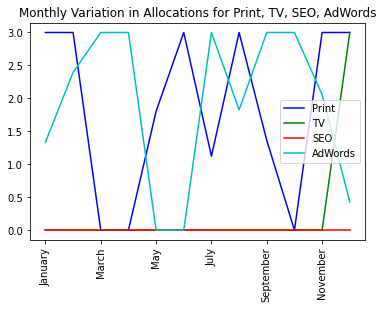

In [59]:
#Monthly Optimal Allocations for the First 4 Mediums
df4.iloc[:,:4].plot(style={list(df4.columns.values)[0]: 'b', list(df4.columns.values)[1]: 'g',list(df4.columns.values)[2]:'r',list(df4.columns.values)[3]:'c'})
plt.xticks(rotation='vertical')
str1 = ", ".join(list(df4.columns.values)[:4])
plt.title("Monthly Variation in Allocations for " + str1)
plt.show()

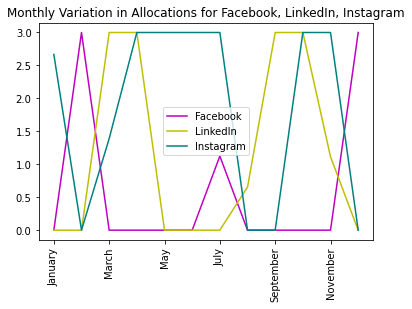

In [60]:
#Monthly Optimal Allocations for the next three mediums
df4.iloc[:,4:7].plot(style={list(df4.columns.values)[4]: 'm', list(df4.columns.values)[5]: 'y',list(df4.columns.values)[6]:'teal'})
plt.xticks(rotation='vertical')
str1 = ", ".join(list(df4.columns.values)[4:7])
plt.title("Monthly Variation in Allocations for " + str1)
plt.show()

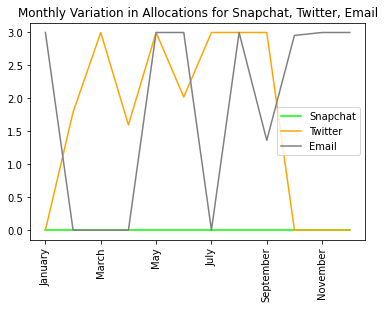

In [61]:
#Monthly Optimal Allocations for the remaining mediums
df4.iloc[:,7:-2].plot(style={list(df4.columns.values)[7]: 'Lime', list(df4.columns.values)[8]: 'Orange',list(df4.columns.values)[9]:'Grey'})
plt.xticks(rotation='vertical')
str1 = ", ".join(list(df4.columns.values)[7:-2])
plt.title("Monthly Variation in Allocations for " + str1)
plt.show()